### Estonian data description

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
estnews = pd.read_parquet('all-est-news.parquet')

estnewsf = estnews.copy(deep=True)
estnewsf = estnewsf[['EstText Index', 'URL', 'Publish_Date']]
estnewsf['Year'] = estnewsf['Publish_Date'].str.slice(0, 4)
estnewsf = estnewsf.dropna(subset=['Year'])
estnewsf['Year'] = estnewsf['Year'].astype(int)
estyearcounts = estnewsf['Year'].value_counts().sort_index()
estyearcounts.index = ['2012' if year <= 2012 else str(year) for year in estyearcounts.index]
estyearcounts = estyearcounts.groupby(estyearcounts.index).sum()
estyearcounts.index = ['<' if year == '2012' else str(year) for year in estyearcounts.index]

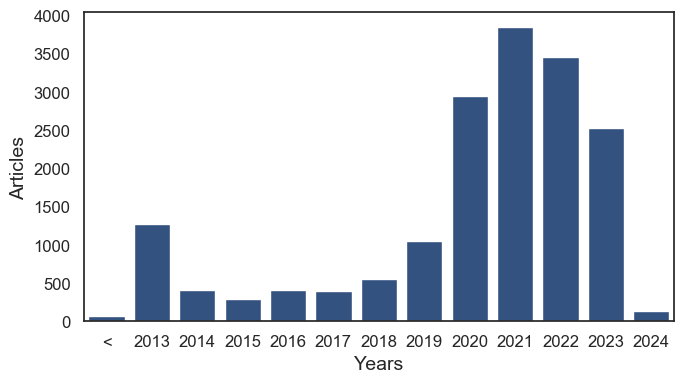

In [18]:
sns.set_theme(style="white")
font = 14

plt.figure(figsize=(7, 4)) 

ax = sns.barplot(x=estyearcounts.index, y=estyearcounts.values, color='#284F8C')

plt.xlabel('Years', fontsize=font)
plt.ylabel('Articles', fontsize=font)
ax.tick_params(axis='both', labelsize=font-2)

plt.tight_layout()
plt.show()